In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [9]:
df = pd.read_csv('OilProduction.csv', parse_dates = ['Year'] )

In [10]:
df.head()

,Year,OilProduction
0,1900-01-01,99
1,1901-01-01,108
2,1902-01-01,138
3,1903-01-01,156
4,1904-01-01,182


In [11]:
df.set_index('Year', inplace = True)

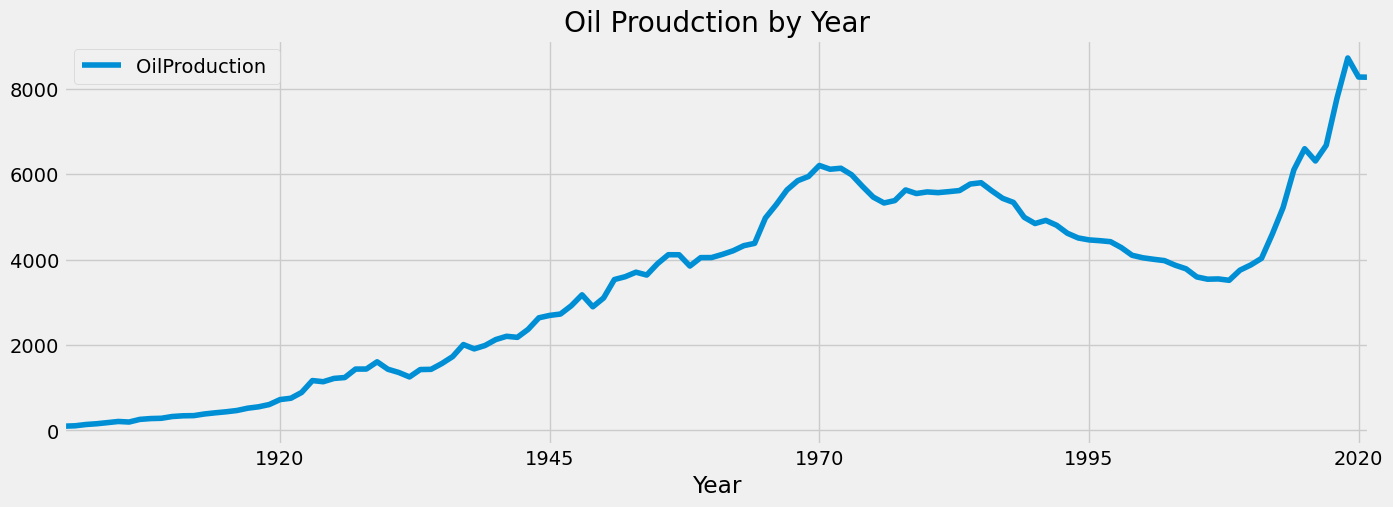

In [12]:
#plot the data
df.plot(figsize = (15, 5), color = color_pal[0], title = "Oil Proudction by Year")
plt.show()

In [16]:
df.columns

Index(['OilProduction '], dtype='object')

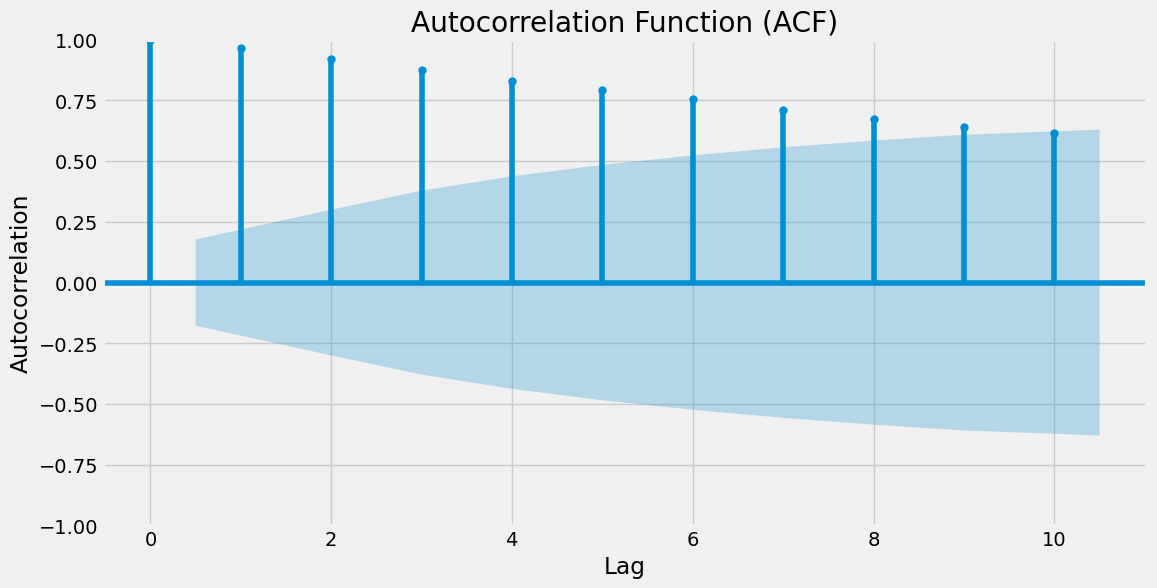

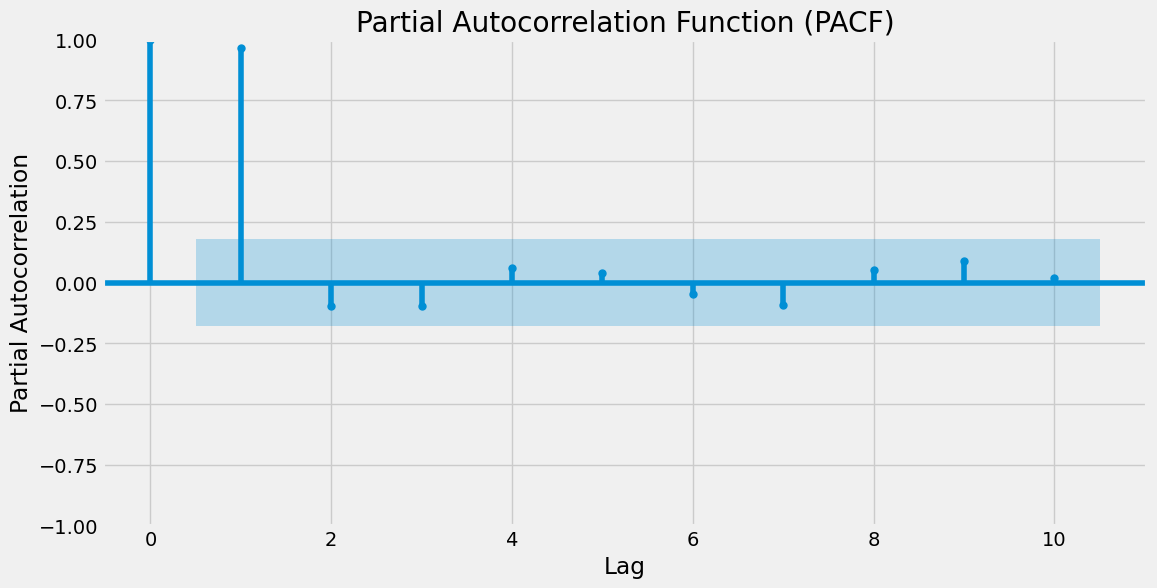

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_acf_pacf(series, lags=None):
    # Plot ACF
    plt.figure(figsize=(12, 6))
    plot_acf(series, lags=lags, ax=plt.gca())
    plt.title('Autocorrelation Function (ACF)')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.show()
    
    # Plot PACF
    plt.figure(figsize=(12, 6))
    plot_pacf(series, lags=lags, ax=plt.gca())
    plt.title('Partial Autocorrelation Function (PACF)')
    plt.xlabel('Lag')
    plt.ylabel('Partial Autocorrelation')
    plt.show()

# Example usage:
# Assuming df is your DataFrame and 'Oil' is the column you want to model
plot_acf_pacf(df['OilProduction '], lags=10)  # You can adjust the number of lags as needed

In [35]:
def create_arima_model(df, column_name, p, d, q):
    # Convert the DataFrame column to a pandas Series
    series = df[column_name]
    
    # Split the data into training and testing sets (80-20 split)
    train_size = int(len(series) * 0.95)
    train, test = series[:train_size], series[train_size:]
    
    # Fit ARIMA model
    model = ARIMA(train, order=(p, d, q))
    fitted_model = model.fit()
    
    # Make predictions
    predictions = fitted_model.forecast(steps=len(test))
    
    # Visualize the training, testing, and predictions
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train.values, label='Training Data')
    plt.plot(test.index, test.values, label='Actual Test Data')
    plt.plot(test.index, predictions, color='red', label='Predicted Test Data')
    plt.title('ARIMA Model Predictions vs Actual')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

    #Forecasting another 24 months 
    final_model = ARIMA(df, order=(p,d,q)).fit()
    prediction=final_model.predict(len(df),len(df)+2)

    df.plot(legend=True, label='Train', figsize=(10,6))
    prediction.plot(legend=True, label='prediction')
    
    # Calculate and print RMSE
    rmse = np.sqrt(mean_squared_error(test, predictions))
    print("Root Mean Squared Error (RMSE):", rmse)

c:\Users\hamin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\hamin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\hamin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\hamin\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\hamin\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible start

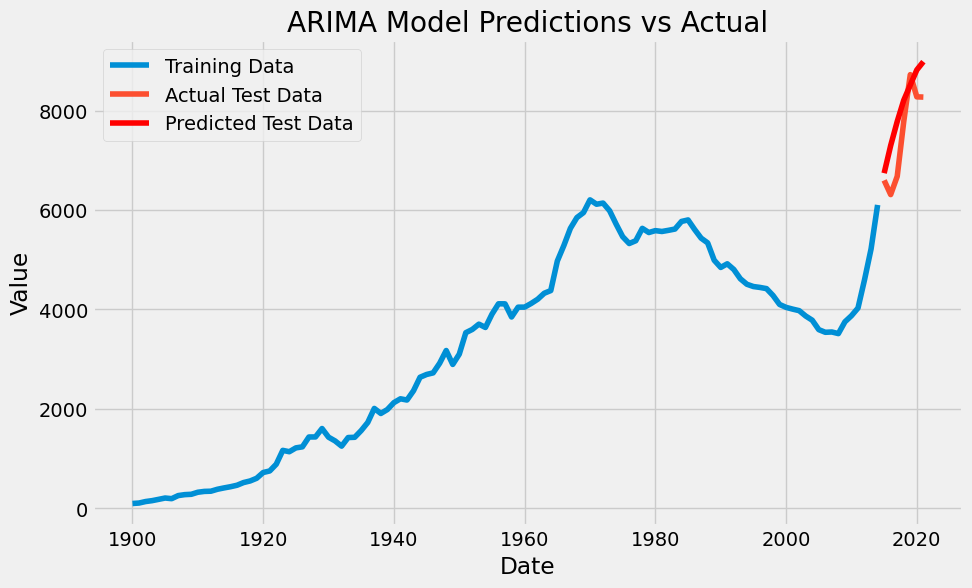

c:\Users\hamin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\hamin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\hamin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\hamin\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\hamin\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible start

Root Mean Squared Error (RMSE): 679.6644260135416


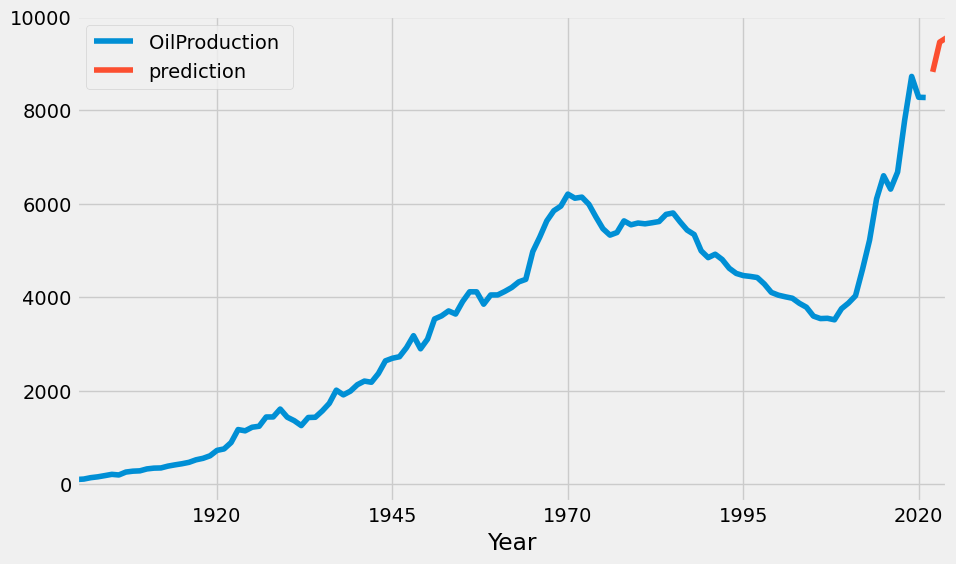

In [36]:
create_arima_model(df, 'OilProduction ', 10,1,5)